# Solution of 2-D Poisson equation: CG method

We consider the Poisson equation
$$
        -(u_{xx} + u_{yy}) = f, \quad\textrm{in}\quad \Omega = [0,1] \times [0,1]
$$
with boundary condition
$$
u = 0, \quad\textrm{on}\quad \partial\Omega
$$
We will take
$$
f = 1
$$
Make a uniform grid with $n$ points in each direction, with spacing
$$
h = \frac{1}{n-1}
$$
The grid points are
$$
x_i = ih, \quad 0 \le i \le n-1
$$
$$
y_j = jh, \quad 0 \le j \le n-1
$$
The finite difference approximation at $(i,j)$ is
$$
-\frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{\Delta x^2} - \frac{u_{i,j-1} - 2u_{i,j} + u_{i,j+1}}{\Delta y^2} = f_{i,j}, \qquad 1 \le i \le n-2, \quad 1 \le j \le n-2
$$
This set of equations if of the form
$$
A U = b
$$
where
$$
A \in \Re^{(n-2)^2 \times (n-2)^2}, \qquad U,b \in \Re^{(n-2)^2}
$$

## CG Algorithm

* Set initial guess $U_0 = 0$, $r_0 = b - A U_0 = b$, $p_0 = 0$
* For $k=0,1,\ldots$
 * If $\| r_k \| < TOL \cdot \|f\|$, then stop
 * If $k=0$, $\beta_1 = 0$
 * If $k > 0$, $\beta_{k+1} = \frac{r_k^\top r_k}{r_{k-1}^\top r_{k-1}}$
 * $p_{k+1} = r_k + \beta_{k+1} p_k$
 * $\alpha_{k+1} = \frac{r_k^\top r_k}{p_{k+1}^\top A p_{k+1}}$
 * $U_{k+1} = U_k + \alpha_{k+1} p_{k+1}$
 * $r_{k+1} = r_k - \alpha_{k+1} p_{k+1}$

## Code

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

This function computes matrix-vector product.

In [12]:
def ax(h,u):
    n = u.shape[0]
    res = np.zeros((n,n))
    for i in range(1,n-1):
        for j in range(1,n-1):
            uxx = (u[i-1,j]-2*u[i,j]+u[i+1,j])/h**2
            uyy = (u[i,j-1]-2*u[i,j]+u[i,j+1])/h**2
            res[i,j] = -(uxx + uyy)
    return res

Number of iterations = 31


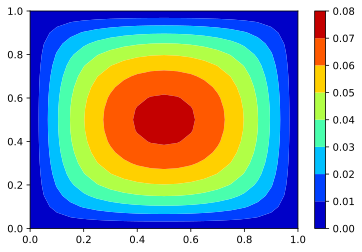

In [13]:
xmin,xmax = 0.0,1.0
n = 21
h = (xmax - xmin)/(n-1)
x = np.linspace(xmin,xmax,n)
X,Y = np.meshgrid(x,x)
f    = np.ones((n,n))

TOL   = 1.0e-6
itmax = 2000

u   = np.zeros((n,n))
p   = np.zeros((n,n))
res = np.array(f)

# First and last grid point, solution is fixed to zero.
# Hence we make residual zero, in which case solution
# will not change at these points.
res[0,:]   = 0.0
res[n-1,:] = 0.0
res[:,0]   = 0.0
res[:,n-1] = 0.0

f_norm = np.linalg.norm(f)
res_old, res_new = 0.0, 0.0
for it in range(itmax):
    res_new = np.linalg.norm(res)
    if res_new < TOL * f_norm:
        break
    if it==0:
        beta = 0.0
    else:
        beta = res_new**2 / res_old**2
    p = res + beta * p
    ap= ax(h,p)
    alpha = res_new**2 / np.sum(p*ap)
    u += alpha * p
    res -= alpha * ap
    res_old = res_new
    
print "Number of iterations = %d" % it
plt.contourf(X,Y,u,cmap=plt.cm.jet)
plt.colorbar();